# Task 2: Credit card detection

- Develop a machine learning model designed to detect fraudulent credit card
transactions.

- The process involves preprocessing and normalizing transaction data, addressing class imbalance concerns, and partitioning the dataset into training and testing subsets.

- Train a classification algorithm—like logistic regression or random forests—to
differentiate between fraudulent and legitimate transactions.

- Assess the model's efficacy using metrics such as precision, recall, and F1-score.

- Additionally, explore strategies like oversampling or undersampling to enhance
outcomes and refine the model's performance.

# Credit Card Fraud Detection Dataset

## Overview
This dataset comprises anonymized credit card transactions, each labeled as either fraudulent or genuine. The primary aim is to facilitate the detection of fraudulent credit card transactions to prevent customers from being charged for unauthorized purchases.

## Context
Credit card companies rely on robust fraud detection mechanisms to safeguard customers from fraudulent transactions. Detecting and preventing fraudulent activities is crucial for maintaining trust and security in financial transactions.

## Content
- The dataset contains credit card transactions made by European cardholders in September 2013.
- Transactions span over two days, with a total of 284,807 transactions.
- Among these transactions, there are 492 instances of fraud.
- The dataset exhibits significant class imbalance, with fraudulent transactions accounting for only 0.172% of the total.
- Features include numerical inputs resulting from a Principal Component Analysis (PCA) transformation. However, due to confidentiality constraints, the original features and additional background information are not provided.
- Features V1 to V28 represent principal components obtained through PCA, while 'Time' and 'Amount' are original features.
- The 'Time' feature denotes the elapsed time in seconds between each transaction and the first transaction in the dataset.
- The 'Amount' feature indicates the transaction amount.
- The response variable, 'Class', takes a value of 1 for fraudulent transactions and 0 otherwise.

## Recommendations
- Given the class imbalance, it's advisable to evaluate model performance using metrics such as the Area Under the Precision-Recall Curve (AUPRC).
- Accuracy metrics derived from a confusion matrix may not be meaningful due to the imbalance in class distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install ydata-profiling --quiet
# !pip install matplotlib
# import ydata_profiling as yp

Retrieving data from Kaggle API

In [2]:
# Uploading the Kaggle API key (kaggle.json) to Colab
from google.colab import files
files.upload()

# Move the uploaded file to the required location of Colab
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud #dataset download
!unzip -q creditcardfraud.zip #unzipping the data

df = pd.read_csv("creditcard.csv") #reading data as pandas dataframe

Saving kaggle.json to kaggle.json
 92% 61.0M/66.0M [00:00<00:00, 168MB/s]
100% 66.0M/66.0M [00:00<00:00, 154MB/s]


Separating the dataframe into the slices I will use to analyze the data and undertand it

In [3]:
data_3_principal = df[['Time', 'Amount', 'Class']]
fraudulent_transactions = df[df['Class'] == 1]
not_fraudulent_transactions = df[df['Class'] == 0]

Profile report of the dataset, overview and relationships between Time, Amount and Class variables

In [4]:
# pf_3_variables = yp.ProfileReport(data_3_principal)
# pf_3_variables

In [5]:
# pf_fraudulent_trans = yp.ProfileReport(fraudulent_transactions[['Time', 'Amount']])
# pf_fraudulent_trans

# EDA, (Exploratory data analysis)

In [6]:
# # Display basic statistics
# print(df.describe())

# Check class distribution
print(df['Class'].value_counts(normalize=True))

0    0.998273
1    0.001727
Name: Class, dtype: float64


There are not correlations between variables grater or equal than 0.7, but there is one grater or equal than 0.5, which is between `Amount` and `V2`



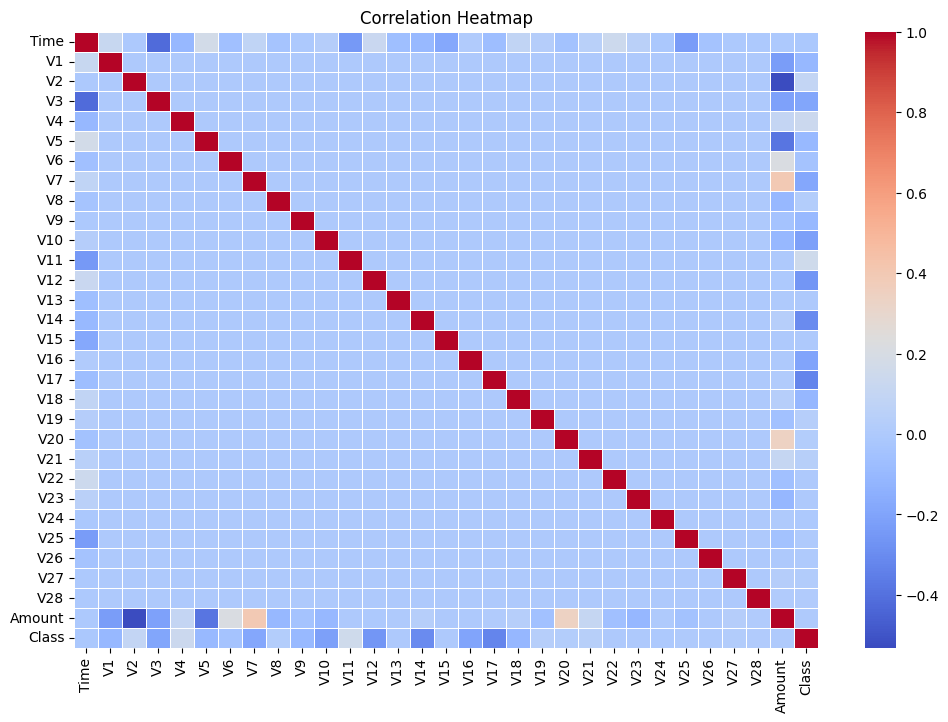

Variables with a correlation grater than 0.5:
{'Amount', 'V2'}


In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Filtering correlations
high_corr_variables = set()
correlation_value = 0.5
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= correlation_value:
            high_corr_variables.add(corr.columns[i])
            high_corr_variables.add(corr.columns[j])

print(f"Variables with a correlation grater than {correlation_value}:")
print(high_corr_variables)

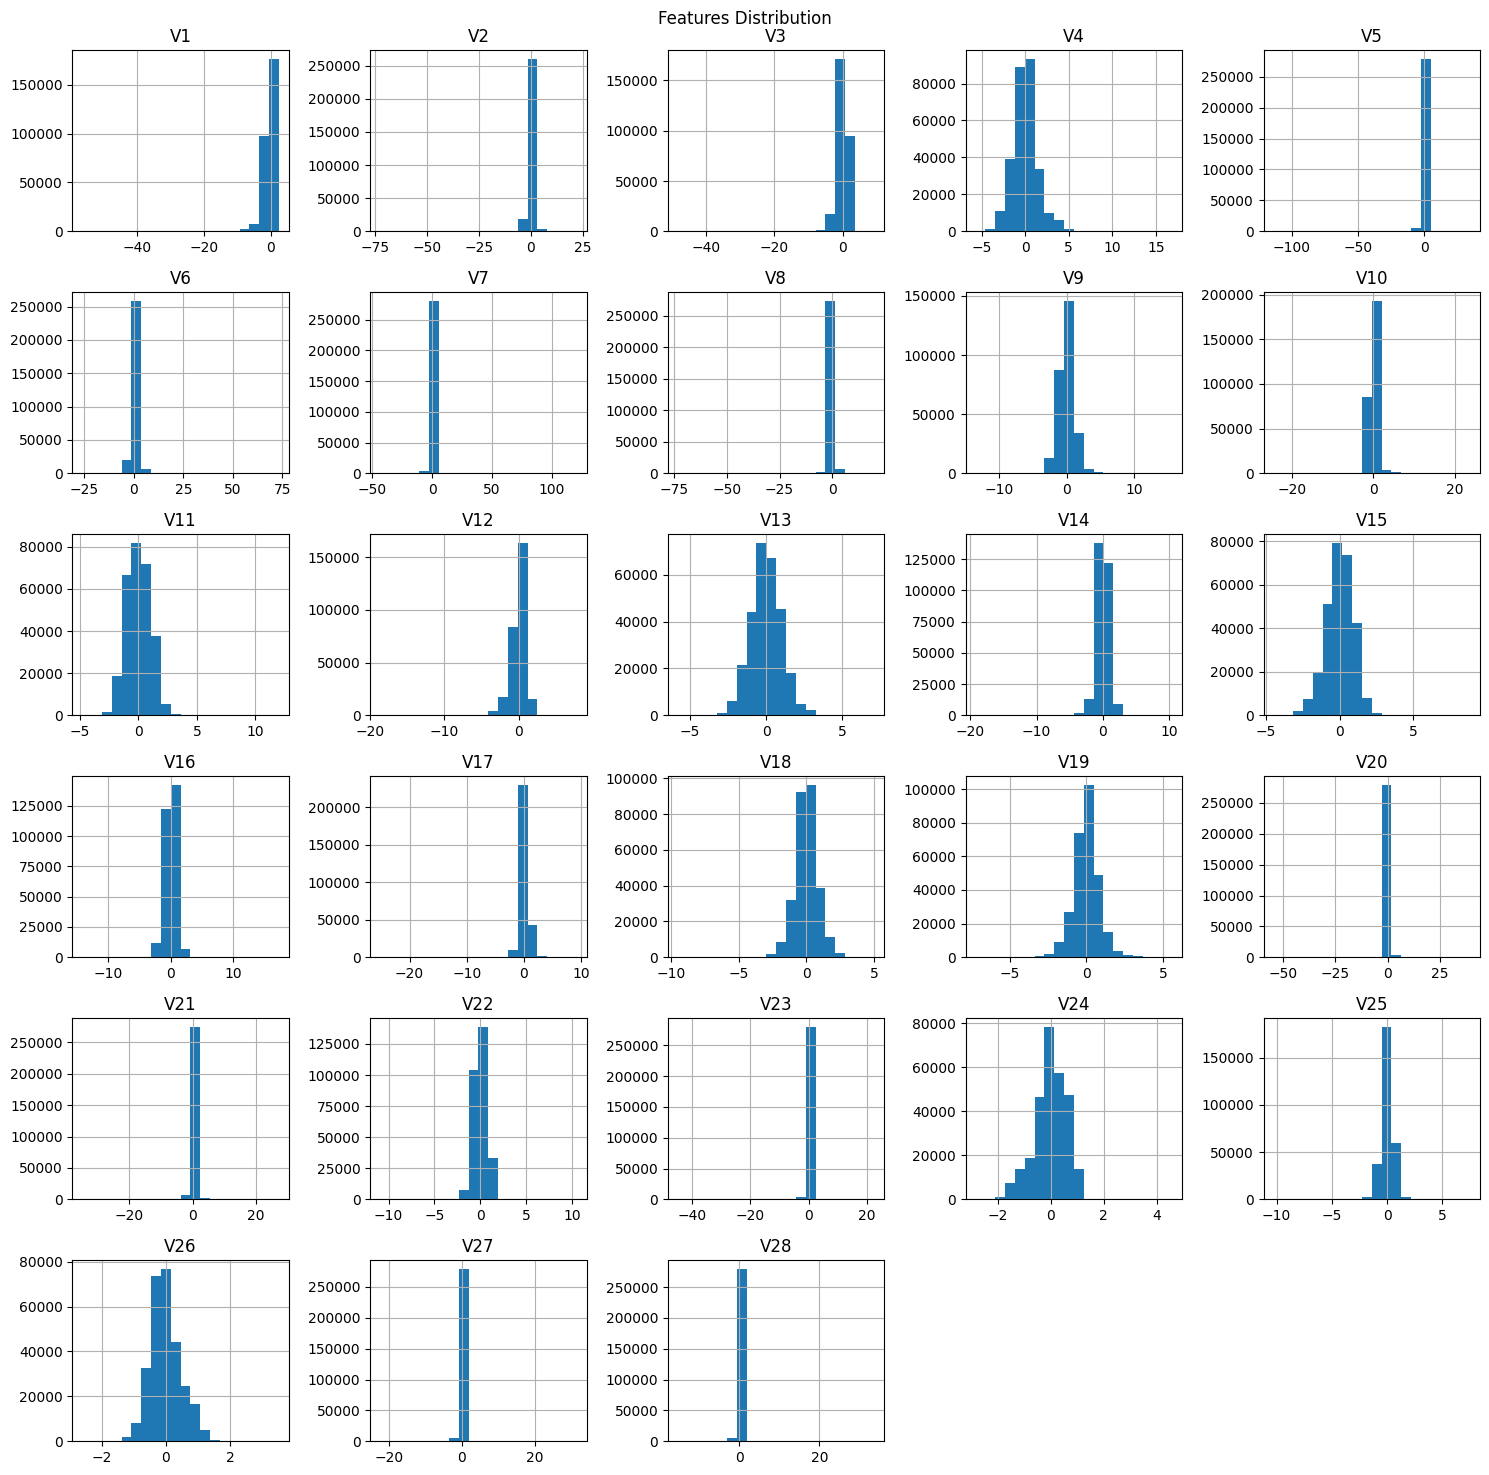

In [8]:
# Distribution of features
df.drop(['Time', 'Amount', 'Class'], axis=1).hist(bins=20, figsize=(15, 15))
plt.suptitle('Features Distribution')
plt.tight_layout()
plt.show()

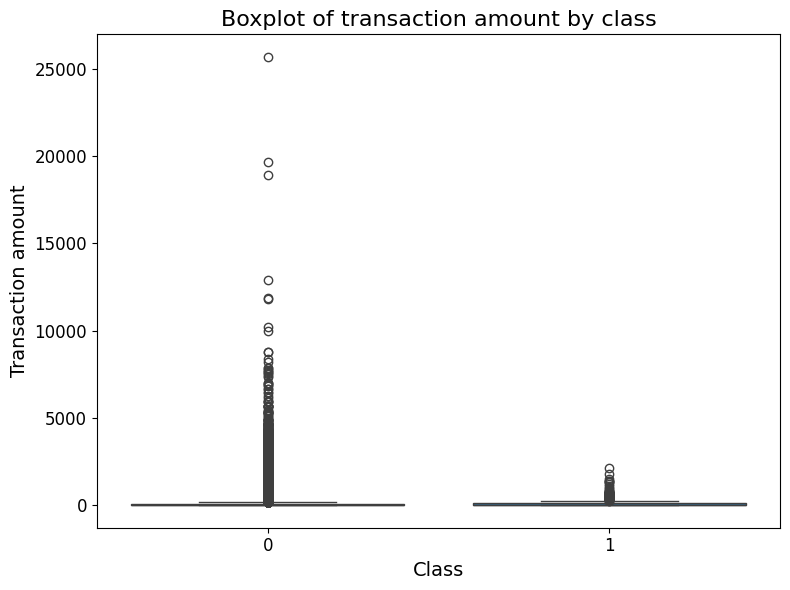

In [9]:
# Boxplot of Amount by Class

plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of transaction amount by class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Transaction amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

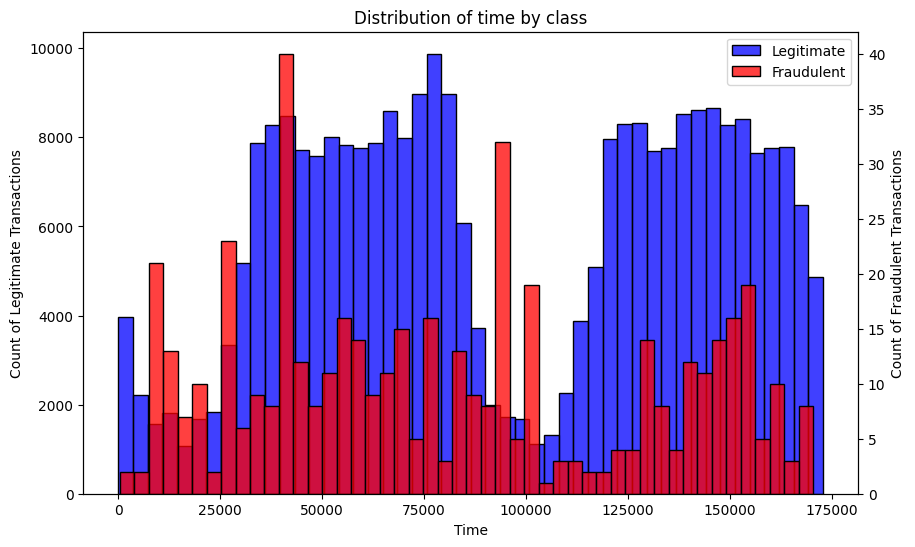

In [10]:
# Distribution of Time feature by class
plt.figure(figsize=(10, 6))

ax = sns.histplot(df[df['Class'] == 0]['Time'], bins=48, color='blue', label='Legitimate')
plt.ylabel('Count of Legitimate Transactions')

# Creating a twin Axes sharing the xaxis
ax2 = ax.twinx()

sns.histplot(df[df['Class'] == 1]['Time'], bins=48, color='red', label='Fraudulent', ax=ax2)
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Distribution of time by class')
plt.xlabel('Time (in seconds)')

# Adjusting legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

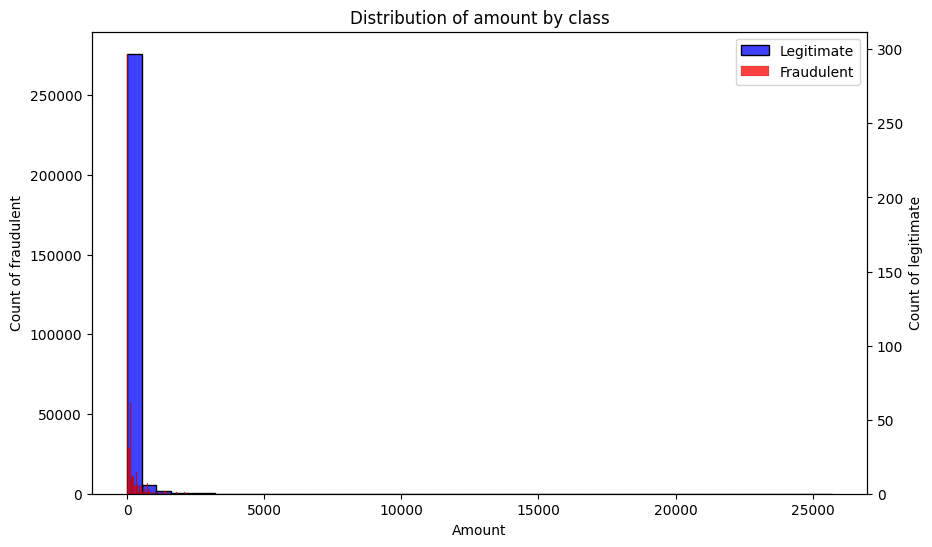

In [11]:
# Distribution of Amount by class
plt.figure(figsize=(10, 6))

ax = sns.histplot(df[df['Class'] == 0]['Amount'], bins=48, color='blue', label='Legitimate')
plt.ylabel('Count of fraudulent')

# Creating a twin Axes sharing the xaxis
ax2 = ax.twinx()

sns.histplot(df[df['Class'] == 1]['Amount'], bins=48, color='red', label='Fraudulent')

plt.title('Distribution of amount by class')
plt.xlabel('Amount')
plt.ylabel('Count of legitimate')

# Adjusting legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()